In [7]:
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install msgpack
!{sys.executable} -m pip install matplotlib
%matplotlib inline


     |████████████████████████████████| 2.1 MB 5.6 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4


Import Pandas, Matplotlib, and Seaborn at the top of your file along with your CSV data


In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
top100 = pd.read_csv('top100videogamesales.csv', index_col=1)


In [282]:
top100.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,,,
Wii Sports,1,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
Mario Kart Wii,2,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
Wii Sports Resort,3,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
New Super Mario Bros.,4,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
Wii Play,5,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


### 1) Regional Sales by Publisher: Create a stacked column (or bar) chart to show the sales by region for each publisher in the data. Explain your chart with markdown and detail which publisher had the most sales.

                             NA_Sales  EU_Sales  JP_Sales  Other_Sales
Publisher                                                             
Nintendo                       273.32    204.49    122.35        53.03
Activision                      94.67     59.91      3.72        21.64
Take-Two Interactive            62.48     43.09      3.56        26.62
Microsoft Game Studios          53.15     18.39      0.62         5.88
Electronic Arts                 24.71     47.41      1.38        14.72
Sony Computer Entertainment     21.77     17.10      6.91        13.20
Ubisoft                         19.54     11.28      0.01         3.14
Bethesda Softworks              10.05      8.72      0.59         3.00
505 Games                        3.50      2.64      0.00         0.67
Sega                             2.58      3.90      0.66         0.91


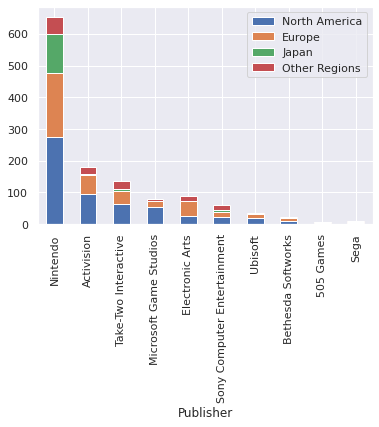

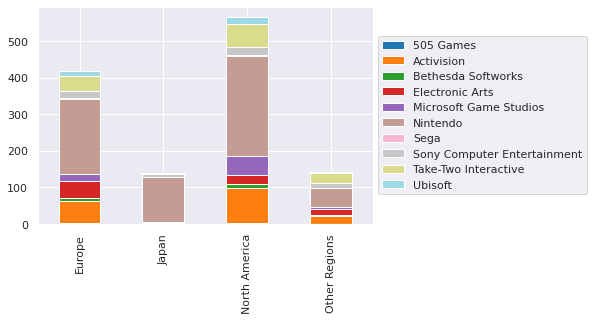

In [530]:
sales = top100.groupby("Publisher")[["NA_Sales","EU_Sales", "JP_Sales", "Other_Sales", "Publisher" ]].sum().sort_values(by=['NA_Sales'], ascending=False)
print(sales)
sales.plot.bar(stacked=True)
plt.legend(["North America", "Europe", "Japan", "Other Regions"]);

table = pd.pivot_table(sales, columns='Publisher', values=["NA_Sales","EU_Sales", "JP_Sales", "Other_Sales"], aggfunc='sum')
table.plot.bar(stacked=True, colormap='tab20' )
plt.xticks([0, 1, 2, 3],  ['Europe', 'Japan', 'North America',  "Other Regions"])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));



### 2) Global Sales by Year: Create a line chart to show the total global sales for each year. Explain the result of the chart in markdown.

Year
2006    167.44
2009    141.83
2010    130.86
2005    110.36
2011    104.97
2008     92.42
2013     88.03
2007     87.92
2012     79.91
2004     68.77
2014     51.91
2015     44.66
2001     43.20
2002     38.83
2003     14.15
Name: Global_Sales, dtype: float64


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

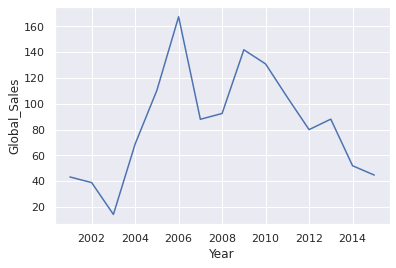

In [524]:
totalsale = top100.groupby("Year")["Global_Sales"].sum().sort_values(ascending=False)
print(totalsale)
sns.lineplot(data=totalsale)

### 3 ) Global Sales Distribution for Action Games: Create a histogram to show the global sales distribution for games with Action as the genre. Explain the chart with markdown.

Name
Grand Theft Auto V                        21.40
Grand Theft Auto: San Andreas             20.81
Grand Theft Auto V                        16.38
Grand Theft Auto: Vice City               16.15
Grand Theft Auto III                      13.10
Grand Theft Auto V                        11.98
Pokemon HeartGold/Pokemon SoulSilver      11.90
Grand Theft Auto IV                       11.02
Grand Theft Auto IV                       10.57
FIFA Soccer 13                             8.24
Grand Theft Auto: Liberty City Stories     7.72
The Legend of Zelda: Twilight Princess     7.31
Uncharted 3: Drake's Deception             6.83
Uncharted 2: Among Thieves                 6.73
Red Dead Redemption                        6.60
Name: Global_Sales, dtype: float64


<AxesSubplot:xlabel='Global_Sales', ylabel='Count'>

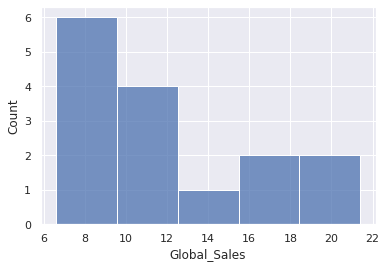

In [593]:
action = top100.loc[(top100['Genre'] == "Action")]
globalsales = action["Global_Sales"]
print(globalsales)
sns.histplot(data=globalsales)
# it is disposed like this because it is the ranking

### 4 ) North American Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

              NA_Sales
Genre                 
Shooter         140.44
Sports           84.87
Action           77.81
Misc             70.60
Racing           56.45
Platform         52.67
Role-Playing     50.48
Simulation       14.61
Fighting         14.40
Puzzle            3.44


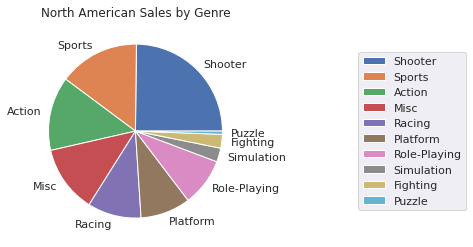

In [650]:
na_sales = top100.groupby("Genre")[["NA_Sales"]].sum().sort_values(by=['NA_Sales'], ascending=False)
print(na_sales)
plot = na_sales.plot.pie(subplots=True)
plt.title("North American Sales by Genre")
plt.ylabel("")
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5));


### 5 )  European Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.


### 6
#### Explain differences and similarities between the North American and European charts in markdown.


### 7
#### Count of Games by Platform: Create a bar (or column) chart to show the total number of games created for each platform in the dataset. Explain the results in markdown.